<a href="https://colab.research.google.com/github/aishwaryatiwari/MachineLearning/blob/main/DataQuest_Guided_Project_Predicting_Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries as needed
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')

In [2]:
# Reading in the cars dataset into a pandas dataframe from the given URL
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')
# The data does not come with headers. Assigning headers explicitly
cars.columns = ['symboling','normalized_losses','make','fuel_type',	'aspiration',	'num_doors',	'body_style',	'drive_wheels',	'engine_location',\
                'wheel_base',	'length',	'width',	'height',	'curb_weight',	'engine_type',	'num_cylinders',	'engine_size',	'fuel_system',	'bore',\
                'stroke',	'compression_ratio',	'horsepower',	'peak_rpm',	'city_mpg',	'highway_mpg',	'price']
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_doors          204 non-null    object 
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_cylinders      204 non-null    object 
 16  engine_size        204 non

In [3]:
cars.head(4)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Replacing '?' values with NAN. We will eventually need to remove all rows where cells used in the model have missing values
cars = cars.replace('?', np.nan)
cars.head(4)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Correcting datatypes to ensure int and float columns are not represented as objects
cars = cars.astype({'normalized_losses':'float', 'bore':'float', 'stroke':'float', 'horsepower':'float', 'peak_rpm':'float', 'price':'float'})
# Check updated datatypes
cars.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [6]:
# 40 out of 204, i.e. 20% records have missing values for normalized losses. We need to explore the best strategy to handle these cases
print('All Records - ', cars.shape, 'Records with null normalized losses - ', np.isnan(cars.normalized_losses).sum())

# Exploring the values of other columns where normalized losses is null - 
cars.loc[cars['normalized_losses'].isnull()].isna().sum()

All Records -  (204, 26) Records with null normalized losses -  40


symboling             0
normalized_losses    40
make                  0
fuel_type             0
aspiration            0
num_doors             1
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [7]:
print('All records - ', cars.shape)
# Removing records from the dataframe where normalized losses and price is null - 
cars = cars.loc[~((cars.normalized_losses.isnull()) & (cars.price.isnull()))]
print('Records after removing rows with null price column - ', cars.shape)

# Few rows have other columns as null, alongwith normalized_losses being null. These are removed as well - 
cars = cars.loc[~((cars.normalized_losses.isnull()) & ((cars.num_doors.isnull()) | (cars.horsepower.isnull()) | (cars.peak_rpm.isnull())))]
cars = cars.loc[~((cars.bore.isnull()) | (cars.stroke.isnull()))]
print('Records after removing rows with other null columns - ', cars.shape)

# Removing Object-type columns from the dataframe
cars = cars.drop(columns={'make','fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type',\
                          'num_cylinders','fuel_system'})
print('Records after removing columns with Object datatype - ', cars.shape)

All records -  (204, 26)
Records after removing rows with null price column -  (200, 26)
Records after removing rows with other null columns -  (193, 26)
Records after removing columns with Object datatype -  (193, 16)


In [8]:
# Proportionally large number of rows have null values for normalized losses. Setting the normalized losses column to the mean value of the column
cars.loc[cars['normalized_losses'].isnull(), 'normalized_losses'] = cars.normalized_losses.mean()

# Validate to see that no columns should have any null values now - 
cars.loc[cars['normalized_losses'].isnull()].isna().sum()

symboling            0
normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [9]:
# After the row deletions above, reseting index to be sequential again
cars = cars.reset_index().drop(columns='index')
cars.head(2)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,121.3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,121.3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [10]:
# Mean-normalize numeric values in the dataframe
# Mean of 0, standard deviation of 1
cars_norm = (cars - cars.mean())/cars.std()
# Set price column back to the original price values
cars_norm['price'] = cars['price']
cars_norm.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.805537,1.315873e-15,-1.691579,-0.436214,-0.837797,-2.135610,-0.022106,0.049018,0.518794,-1.829888,-0.285459,0.199302,-0.217949,-0.680464,-0.558324,16500.0
1,0.173365,1.315873e-15,-0.727321,-0.244712,-0.183351,-0.621970,0.499346,0.577272,-2.374423,0.695026,-0.285459,1.332182,-0.217949,-0.993900,-0.705132,16500.0
2,0.989451,1.317955e+00,0.138876,0.186169,0.143871,0.176896,-0.422201,-0.455224,-0.506650,0.471300,-0.034257,-0.037813,0.846966,-0.210311,-0.117902,13950.0
3,0.989451,1.317955e+00,0.073503,0.186169,0.237364,0.176896,0.501242,0.193087,-0.506650,0.471300,-0.536661,0.304686,0.846966,-1.150618,-1.292361,17450.0
4,0.989451,1.315873e-15,0.138876,0.242024,0.190618,-0.327650,-0.099849,0.193087,-0.506650,0.471300,-0.411060,0.172956,0.846966,-0.993900,-0.851939,15250.0


In [11]:
def knn_train_test(train_col, tgt_col, df):
  cars_train, cars_test = train_test_split(df, test_size=0.5, random_state=1)
  knn = KNeighborsRegressor(algorithm='brute')
  knn.fit(cars_train[[train_col]], cars_train[tgt_col])
  price_predictions = knn.predict(cars_test[[train_col]])
  rmse = mean_squared_error(cars_test[[train_col]], price_predictions) ** (1/2)
  return rmse

In [12]:
all_col = cars_norm.columns
all_col = all_col.drop(['price'])
print(all_col)

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg'],
      dtype='object')


In [13]:
col_rmse = dict()
for col in all_col:
  col_rmse[col] = knn_train_test(col, 'price', cars_norm)

print(col_rmse)

{'symboling': 18456.76250041304, 'normalized_losses': 13479.775227199387, 'wheel_base': 14505.719639067049, 'length': 13457.76853679034, 'width': 13838.819977769874, 'height': 14452.73590344872, 'curb_weight': 14692.06687297445, 'engine_size': 14856.93115720021, 'bore': 13526.98018618818, 'stroke': 13848.219318165393, 'compression_ratio': 15830.608403778013, 'horsepower': 15344.293077048636, 'peak_rpm': 14116.777023547627, 'city_mpg': 14064.382339281974, 'highway_mpg': 14129.206813219167}


In [14]:
min_rmse_value = min(col_rmse.values())
min_rmse_col = [key for key in col_rmse.keys() if col_rmse[key] == min(col_rmse.values())]

print('For univariate regression with default k = 5, we get the minimum error of ', min_rmse_value, 'in price predictions for -', min_rmse_col)

For univariate regression with default k = 5, we get the minimum error of  13457.76853679034 in price predictions for - ['length']


In [15]:
# Modifiying the univariate regression function we created above to include k-value as a hyperparameter
def knn_train_test_variable_k(train_col, tgt_col, df, k):
  cars_train, cars_test = train_test_split(df, test_size=0.5, random_state=1)
  knn = KNeighborsRegressor(algorithm='brute', n_neighbors=k)
  knn.fit(cars_train[[train_col]], cars_train[tgt_col])
  price_predictions = knn.predict(cars_test[[train_col]])
  rmse = mean_squared_error(cars_test[[train_col]], price_predictions) ** (1/2)
  return rmse

In [16]:
# Re-running the univariate regression function, with the new hyperparameter values 
col_rmse_k = []
k_val = [1,3,5,7,9]
for col in all_col:
  for k in k_val:
    col_rmse_k.append([col, k, knn_train_test_variable_k(col, 'price', cars_norm,k)])

print(col_rmse_k)

# Converting the list above into a dataframe for ease of analysis and plotting -
col_rmse_k_df = pd.DataFrame(col_rmse_k)
col_rmse_k_df.columns=['col', 'k_val', 'rmse']
print(col_rmse_k_df.shape)
print(col_rmse_k_df.head(2))

[['symboling', 1, 18918.866910400055], ['symboling', 3, 14833.508729348143], ['symboling', 5, 18456.76250041304], ['symboling', 7, 16471.246269961728], ['symboling', 9, 16062.155893374758], ['normalized_losses', 1, 14357.232823328264], ['normalized_losses', 3, 16111.012457259607], ['normalized_losses', 5, 13479.775227199387], ['normalized_losses', 7, 13292.920534550887], ['normalized_losses', 9, 12864.812918110336], ['wheel_base', 1, 14168.324835169322], ['wheel_base', 3, 13995.611080561937], ['wheel_base', 5, 14505.719639067049], ['wheel_base', 7, 14343.24959555942], ['wheel_base', 9, 14266.973333737042], ['length', 1, 14594.975640452903], ['length', 3, 13393.363555769982], ['length', 5, 13457.76853679034], ['length', 7, 13478.586385346089], ['length', 9, 13588.318683692602], ['width', 1, 14837.272306404513], ['width', 3, 14334.479913480836], ['width', 5, 13838.819977769874], ['width', 7, 13673.870985829442], ['width', 9, 13720.62043867801], ['height', 1, 12564.875749168354], ['height

The following scatter plot shows us how varying the hyperparameter, i.e. the number of neighbors analyzed for univariate regression, affects the error in price predictions across many possible features impacting the price of a car.

With the default k value of 5, the variable length appears to be the most promising feature, giving the minimum error. Symboling shows as the least promising feature, with consistently high error values across multiple hyperparameters.

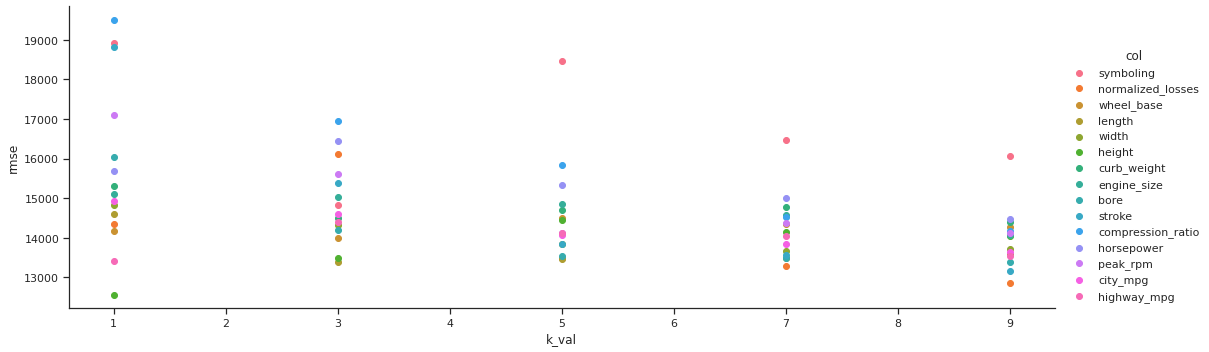

In [17]:
fg = seaborn.FacetGrid(data=col_rmse_k_df, hue='col', aspect=3, height=5)
fg.map(pyplot.scatter, 'k_val', 'rmse').add_legend()

In [20]:
# Modifiying the regression function we created above to accept multiple feature columns to predict the car price. 
# Here we are using the default k-value of 5
def knn_train_test_multi(train_cols, tgt_col, df):
  cars_train, cars_test = train_test_split(df, test_size=0.5, random_state=1)
  knn = KNeighborsRegressor(algorithm='brute')
  knn.fit(cars_train[train_cols], cars_train[tgt_col])
  price_predictions = knn.predict(cars_test[train_cols])
  rmse = mean_squared_error(cars_test[tgt_col], price_predictions) ** (1/2)
  return rmse

In [42]:
cols_2 = col_rmse_k_df.loc[col_rmse_k_df['k_val']==5].sort_values(by=['rmse'], ascending=True)[:2]['col']
multi_rmse_2 = knn_train_test_multi(cols_2, 'price', cars_norm)

cols_3 = col_rmse_k_df.loc[col_rmse_k_df['k_val']==5].sort_values(by=['rmse'], ascending=True)[:3]['col']
multi_rmse_3 = knn_train_test_multi(cols_3, 'price', cars_norm)

cols_4 = col_rmse_k_df.loc[col_rmse_k_df['k_val']==5].sort_values(by=['rmse'], ascending=True)[:4]['col']
multi_rmse_4 = knn_train_test_multi(cols_4, 'price', cars_norm)

cols_5 = col_rmse_k_df.loc[col_rmse_k_df['k_val']==5].sort_values(by=['rmse'], ascending=True)[:5]['col']
multi_rmse_5 = knn_train_test_multi(cols_5, 'price', cars_norm)

print('Multivariate regression results with default k-value of 5 - ')
print('',cols_2.values, multi_rmse_2, '\n',cols_3.values, multi_rmse_3, '\n', cols_4.values, multi_rmse_4, '\n', cols_5.values, multi_rmse_5)

Multivariate regression results with default k-value of 5 - 
 ['length' 'normalized_losses'] 5241.64522055283 
 ['length' 'normalized_losses' 'bore'] 5384.83571607084 
 ['length' 'normalized_losses' 'bore' 'width'] 5443.759169892971 
 ['length' 'normalized_losses' 'bore' 'width' 'stroke'] 5278.796525099453
